In [1]:
if 1 :
    %matplotlib inline
else :
    %matplotlib notebook

#  Import  libraries

In [2]:
import sys
import os
module_path = os.path.abspath('.') +"\\_scripts"
print(module_path)

if module_path not in sys.path:
    sys.path.append(module_path)
from _00_Import_packages_git3 import *

C:\Users\ng947ac\Documents\Daniel\jupyter\SoSTrades\jupyter_doc\_scripts
C:\Users\ng947ac\Documents\Daniel\git\workspace
C:\Users\ng947ac\Documents\Daniel\git\workspace\sosgemseo\src\
C:\Users\ng947ac\Documents\Daniel\git\workspace\sostrades-core


In [3]:
from platform import python_version

print(python_version())

3.9.7


In [4]:
import numpy
print(numpy.__version__)

1.20.3


In [5]:
import scipy
print(scipy.__version__)

1.7.1


In [6]:
import pandas
print(pandas.__version__)

1.4.1


In [7]:
from numpy import array
import pandas as pd
from sos_trades_core.execution_engine.execution_engine import ExecutionEngine
from numpy.testing import assert_array_equal, assert_array_almost_equal  # @UnresolvedImport
import os
from gemseo.core.mdo_scenario import MDOScenario

# 1) Set up

In [8]:
#from sos_trades_core.sos_wrapping.test_discs.sellar import Sellar1
from sos_trades_core.execution_engine.execution_engine import ExecutionEngine

In [9]:
study_name = 'optim'
ns = f'{study_name}'
sc_name = "SobOptimScenario"

In [10]:
repo = 'sos_trades_core.sos_processes.test'
proc_name = 'test_sobieski_opt_bilevel'

# 2) Sobieski optim builder

In [11]:
exec_eng = ExecutionEngine(study_name)
ns_dict={'ns_OptimSobieski': study_name + '.SobOptimScenario'}
#exec_eng.ns_manager.add_ns_def(ns_dict)
#exec_eng.ns_manager.add_ns('ns_OptimSobieski', study_name + '.SobOptimScenario')
factory = exec_eng.factory
builder = factory.get_builder_from_process(repo=repo,mod_id=proc_name)
exec_eng.factory.set_builders_to_coupling_builder(builder)

In [12]:
exec_eng.configure() 

INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [13]:
exec_eng.ns_manager.all_ns_dict.keys()

dict_keys(['ns_OptimSobieski__optim.SobOptimScenario'])

In [14]:
exec_eng.ns_manager.all_ns_dict['ns_OptimSobieski__optim.SobOptimScenario'].to_dict()

{'name': 'ns_OptimSobieski',
 'value': 'optim.SobOptimScenario',
 'dependency_disc_list': ['58f6c2d6-62cb-459c-8730-1270aae74f84',
  '3658fee9-c3f7-4a1d-853e-c962636676f2',
  'fb11d82d-b22b-4546-9086-ca1f120c461b',
  '8c699623-2b78-423b-920f-151338fa409f']}

In [15]:
exec_eng.display_treeview_nodes()

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	|_ SobOptimScenario
		|_ sc_struct
			|_ struct
		|_ sc_aero
			|_ aero
		|_ sc_prop
			|_ prop
		|_ mission


'Nodes representation for Treeview optim\n|_ optim\n\t|_ SobOptimScenario\n\t\t|_ sc_struct\n\t\t\t|_ struct\n\t\t|_ sc_aero\n\t\t\t|_ aero\n\t\t|_ sc_prop\n\t\t\t|_ prop\n\t\t|_ mission'

In [16]:
exec_eng.display_treeview_nodes(True)

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	-> acceleration
	-> authorize_self_coupled_disciplines
	-> cache_file_path
	-> cache_type
	-> chain_linearize
	-> debug_mode
	-> epsilon0
	-> group_mda_disciplines
	-> linear_solver_MDA
	-> linear_solver_MDA_options
	-> linear_solver_MDA_preconditioner
	-> linear_solver_MDO
	-> linear_solver_MDO_options
	-> linear_solver_MDO_preconditioner
	-> linearization_mode
	-> max_mda_iter
	-> n_processes
	-> n_subcouplings_parallel
	-> relax_factor
	-> sub_mda_class
	-> tolerance
	-> tolerance_gs
	-> use_lu_fact
	-> warm_start
	-> warm_start_threshold
	<- residuals_history
	|_ SobOptimScenario
		-> algo
		-> algo_options
		-> cache_file_path
		-> cache_type
		-> debug_mode
		-> design_space
		-> differentiation_method
		-> eq_constraints
		-> eval_jac
		-> eval_mode
		-> execute_at_xopt
		-> formulation
		-> ineq_constraints
		-> linearization_mode
		-> max_iter
		-> maximize_objective
		-> objective_name
		-> parallel_options
		-> x_

'Nodes representation for Treeview optim\n|_ optim\n\t-> acceleration\n\t-> authorize_self_coupled_disciplines\n\t-> cache_file_path\n\t-> cache_type\n\t-> chain_linearize\n\t-> debug_mode\n\t-> epsilon0\n\t-> group_mda_disciplines\n\t-> linear_solver_MDA\n\t-> linear_solver_MDA_options\n\t-> linear_solver_MDA_preconditioner\n\t-> linear_solver_MDO\n\t-> linear_solver_MDO_options\n\t-> linear_solver_MDO_preconditioner\n\t-> linearization_mode\n\t-> max_mda_iter\n\t-> n_processes\n\t-> n_subcouplings_parallel\n\t-> relax_factor\n\t-> sub_mda_class\n\t-> tolerance\n\t-> tolerance_gs\n\t-> use_lu_fact\n\t-> warm_start\n\t-> warm_start_threshold\n\t<- residuals_history\n\t|_ SobOptimScenario\n\t\t-> algo\n\t\t-> algo_options\n\t\t-> cache_file_path\n\t\t-> cache_type\n\t\t-> debug_mode\n\t\t-> design_space\n\t\t-> differentiation_method\n\t\t-> eq_constraints\n\t\t-> eval_jac\n\t\t-> eval_mode\n\t\t-> execute_at_xopt\n\t\t-> formulation\n\t\t-> ineq_constraints\n\t\t-> linearization_mode\n

# 3) Design Space

In [17]:
dspace_dict = {'variable': ['z', 'x_1', 'x_2', 'x_3'],
               'value': [
                        [0.05, 45000.0,1.6,5.5,55.0,1000.0], 
                        [0.25, 1.0], 
                        [1.0],
                        [0.5]],
               'lower_bnd': [
                        [0.01,30000.0,1.4,2.5,40.0,500.0], 
                        [0.1,0.75], 
                        [0.75],
                        [0.1]],
               'upper_bnd': [
                        [0.09,60000.0,1.8,8.5,70.0,1500.0], 
                        [0.4,1.25], 
                        [1.25],
                        [1.0]],
               'enable_variable': [True, True, True, True],
               'activated_elem': [[True, True, True, True, True, True], [True, True], [True], [True]]}

In [18]:
dspace = pd.DataFrame(dspace_dict)
dspace

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"
1,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"
2,x_2,[1.0],[0.75],[1.25],True,[True]
3,x_3,[0.5],[0.1],[1.0],True,[True]


In [19]:
#dspace.to_dict('list')

In [20]:
dspace_coupl_dict = {'variable': ['y_14','y_32','y_31','y_24','y_34','y_23','y_21','y_12'],
               'value': [
                        [50606.9741711,7306.20262124], 
                        [0.50279625], 
                        [6354.32430691],
                        [4.15006276],
                        [1.10754577],
                        [12194.2671934],
                        [50606.9741711],
                        [50606.9742,0.95]
                        ],
               'lower_bnd':  [
                        [24850.0,-7700.0], 
                        [0.235], 
                        [2960.0],
                        [0.44],
                        [0.44],
                        [3365.0],
                        [24850.0],
                        [24850.0,0.45]
                        ],
               'upper_bnd':   [
                        [77100.0,45000.0], 
                        [0.795], 
                        [10185.0],
                        [11.13],
                        [1.98],
                        [26400.0],
                        [77250.0],
                        [77250.0,1.5]
                        ],
               'enable_variable': [True, True, True, True, True, True, True, True],
               'activated_elem': [[True, True], [True], [True], [True], [True], [True], [True],[True, True]]}

In [21]:
dspace_coupl = pd.DataFrame(dspace_coupl_dict)
dspace_coupl

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,y_14,"[50606.9741711, 7306.20262124]","[24850.0, -7700.0]","[77100.0, 45000.0]",True,"[True, True]"
1,y_32,[0.50279625],[0.235],[0.795],True,[True]
2,y_31,[6354.32430691],[2960.0],[10185.0],True,[True]
3,y_24,[4.15006276],[0.44],[11.13],True,[True]
4,y_34,[1.10754577],[0.44],[1.98],True,[True]
5,y_23,[12194.2671934],[3365.0],[26400.0],True,[True]
6,y_21,[50606.9741711],[24850.0],[77250.0],True,[True]
7,y_12,"[50606.9742, 0.95]","[24850.0, 0.45]","[77250.0, 1.5]",True,"[True, True]"


In [22]:
# merge dataframe (add lines)
frames = [dspace,dspace_coupl]
dspace_all = pd.concat(frames)
dspace_all

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"
1,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"
2,x_2,[1.0],[0.75],[1.25],True,[True]
3,x_3,[0.5],[0.1],[1.0],True,[True]
0,y_14,"[50606.9741711, 7306.20262124]","[24850.0, -7700.0]","[77100.0, 45000.0]",True,"[True, True]"
1,y_32,[0.50279625],[0.235],[0.795],True,[True]
2,y_31,[6354.32430691],[2960.0],[10185.0],True,[True]
3,y_24,[4.15006276],[0.44],[11.13],True,[True]
4,y_34,[1.10754577],[0.44],[1.98],True,[True]
5,y_23,[12194.2671934],[3365.0],[26400.0],True,[True]


In [23]:
# convert dataframe to dict
dspace_all_dict = dspace_all.to_dict('list')

In [24]:
dspace_struct = dspace.loc[dspace['variable'] == 'x_1'].reset_index(drop=True)
dspace_struct

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"


In [25]:
dspace_aero = dspace.loc[dspace['variable'] == 'x_2'].reset_index(drop=True)
dspace_aero

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,x_2,[1.0],[0.75],[1.25],True,[True]


In [26]:
dspace_prop = dspace.loc[dspace['variable'] == 'x_3'].reset_index(drop=True)
dspace_prop

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,x_3,[0.5],[0.1],[1.0],True,[True]


In [27]:
dspace_bi_mission = dspace.loc[dspace['variable'] == 'z'].reset_index(drop=True)
dspace_bi_mission

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"


# 4) Optim and Sobieski inputs

In [28]:
#-- set up disciplines in Scenario
disc_dict = {}
disc_dict[f'{ns}.tolerance'] = 1e-14
disc_dict[f'{ns}.max_mda_iter'] = 30
#disc_dict[f'{ns}.warm_start'] = True
#disc_dict[f'{ns}.use_lu_fact'] = True
disc_dict

{'optim.tolerance': 1e-14, 'optim.max_mda_iter': 30}

In [29]:
#exec_eng.dm.set_values_from_dict(disc_dict)
exec_eng.load_study_from_input_dict(disc_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.formulation value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.objective_name value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_struct.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_struct.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_struct.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_struct.formulation value is no

In [30]:
algo_options = {'xtol_rel': 1e-7, 
               'xtol_abs': 1e-7,
               'ftol_rel': 1e-7, 
               'ftol_abs': 1e-7,
                'ineq_tolerance': 1e-4}

# 4.1 sc_struct inputs

In [31]:
sub_scenario = 'sc_struct'
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.max_iter'] = 30
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo'] = "SLSQP"
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.design_space'] = dspace_struct
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.formulation'] = 'DisciplinaryOpt'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.objective_name'] = 'y_11'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.maximize_objective'] = True
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.ineq_constraints'] = [f'g_1']
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo_options'] = algo_options
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.cache_type'] = 'SimpleCache'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.struct.cache_type'] = 'SimpleCache'
disc_dict

{'optim.SobOptimScenario.sc_struct.max_iter': 30,
 'optim.SobOptimScenario.sc_struct.algo': 'SLSQP',
 'optim.SobOptimScenario.sc_struct.design_space':   variable        value    lower_bnd    upper_bnd  enable_variable  \
 0      x_1  [0.25, 1.0]  [0.1, 0.75]  [0.4, 1.25]             True   
 
   activated_elem  
 0   [True, True]  ,
 'optim.SobOptimScenario.sc_struct.formulation': 'DisciplinaryOpt',
 'optim.SobOptimScenario.sc_struct.objective_name': 'y_11',
 'optim.SobOptimScenario.sc_struct.maximize_objective': True,
 'optim.SobOptimScenario.sc_struct.ineq_constraints': ['g_1'],
 'optim.SobOptimScenario.sc_struct.algo_options': {'xtol_rel': 1e-07,
  'xtol_abs': 1e-07,
  'ftol_rel': 1e-07,
  'ftol_abs': 1e-07,
  'ineq_tolerance': 0.0001},
 'optim.SobOptimScenario.sc_struct.cache_type': 'SimpleCache',
 'optim.SobOptimScenario.sc_struct.struct.cache_type': 'SimpleCache'}

In [32]:
#exec_eng.dm.set_values_from_dict(disc_dict)
exec_eng.load_study_from_input_dict(disc_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.formulation value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.objective_name value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_aero.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_aero.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_aero.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_aero.formulation value is not set!
E

# 4.2 sc_aero inputs

In [33]:
sub_scenario = 'sc_aero'
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.max_iter'] = 30
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo'] = "SLSQP"
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.design_space'] = dspace_aero
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.formulation'] = 'DisciplinaryOpt'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.objective_name'] = 'y_24'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.maximize_objective'] = True
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.ineq_constraints'] = [f'g_2']
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo_options'] = algo_options
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.cache_type'] = 'SimpleCache'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.aero.cache_type'] = 'SimpleCache'
disc_dict

{'optim.SobOptimScenario.sc_aero.max_iter': 30,
 'optim.SobOptimScenario.sc_aero.algo': 'SLSQP',
 'optim.SobOptimScenario.sc_aero.design_space':   variable  value lower_bnd upper_bnd  enable_variable activated_elem
 0      x_2  [1.0]    [0.75]    [1.25]             True         [True],
 'optim.SobOptimScenario.sc_aero.formulation': 'DisciplinaryOpt',
 'optim.SobOptimScenario.sc_aero.objective_name': 'y_24',
 'optim.SobOptimScenario.sc_aero.maximize_objective': True,
 'optim.SobOptimScenario.sc_aero.ineq_constraints': ['g_2'],
 'optim.SobOptimScenario.sc_aero.algo_options': {'xtol_rel': 1e-07,
  'xtol_abs': 1e-07,
  'ftol_rel': 1e-07,
  'ftol_abs': 1e-07,
  'ineq_tolerance': 0.0001},
 'optim.SobOptimScenario.sc_aero.cache_type': 'SimpleCache',
 'optim.SobOptimScenario.sc_aero.aero.cache_type': 'SimpleCache'}

In [34]:
#exec_eng.dm.set_values_from_dict(disc_dict)
exec_eng.load_study_from_input_dict(disc_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.formulation value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.objective_name value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_prop.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_prop.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_prop.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.sc_prop.formulation value is not set!
E

# 4.3 sc_prop inputs

In [35]:
sub_scenario = 'sc_prop'
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.max_iter'] = 30
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo'] = "SLSQP"
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.design_space'] = dspace_prop
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.formulation'] = 'DisciplinaryOpt'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.objective_name'] = 'y_34'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.maximize_objective'] = False
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.ineq_constraints'] = [f'g_3']
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.algo_options'] = algo_options
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.cache_type'] = 'SimpleCache'
disc_dict[f'{ns}.{sc_name}.{sub_scenario}.prop.cache_type'] = 'SimpleCache'
disc_dict

{'optim.SobOptimScenario.sc_prop.max_iter': 30,
 'optim.SobOptimScenario.sc_prop.algo': 'SLSQP',
 'optim.SobOptimScenario.sc_prop.design_space':   variable  value lower_bnd upper_bnd  enable_variable activated_elem
 0      x_3  [0.5]     [0.1]     [1.0]             True         [True],
 'optim.SobOptimScenario.sc_prop.formulation': 'DisciplinaryOpt',
 'optim.SobOptimScenario.sc_prop.objective_name': 'y_34',
 'optim.SobOptimScenario.sc_prop.maximize_objective': False,
 'optim.SobOptimScenario.sc_prop.ineq_constraints': ['g_3'],
 'optim.SobOptimScenario.sc_prop.algo_options': {'xtol_rel': 1e-07,
  'xtol_abs': 1e-07,
  'ftol_rel': 1e-07,
  'ftol_abs': 1e-07,
  'ineq_tolerance': 0.0001},
 'optim.SobOptimScenario.sc_prop.cache_type': 'SimpleCache',
 'optim.SobOptimScenario.sc_prop.prop.cache_type': 'SimpleCache'}

In [36]:
#exec_eng.dm.set_values_from_dict(disc_dict)
exec_eng.load_study_from_input_dict(disc_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.max_iter value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.algo value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.design_space value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.formulation value is not set!
ERROR:SoS.EE.DataManager:Variable: optim.SobOptimScenario.objective_name value is not set!


# 4.4 SobOptimScenario inputs

In [37]:
from gemseo.algos.opt.opt_factory import OptimizersFactory
algo_list = OptimizersFactory().algorithms
print("Available algorithms:" +str(algo_list))

Available algorithms:['CMAES', 'NLOPT_MMA', 'NLOPT_COBYLA', 'NLOPT_SLSQP', 'NLOPT_BOBYQA', 'NLOPT_BFGS', 'NLOPT_NEWUOA', 'DUAL_ANNEALING', 'SHGO', 'DIFFERENTIAL_EVOLUTION', 'LINEAR_INTERIOR_POINT', 'REVISED_SIMPLEX', 'SIMPLEX', 'SLSQP', 'L-BFGS-B', 'TNC']


In [38]:
#-- set up disciplines in Scenario
disc_dict = {}
# Optim inputs
disc_dict[f'{ns}.{sc_name}.max_iter'] = 50
# SLSQP, NLOPT_SLSQP
disc_dict[f'{ns}.{sc_name}.algo'] = "NLOPT_COBYLA"
disc_dict[f'{ns}.{sc_name}.design_space'] = dspace_all# in gemseo I would have provided dspace_bi_mission In SoStrades I need dspace_all! (if not I have an error???)
#disc_dict[f'{ns}.{sc_name}.design_space'] = dspace_bi_mission 
disc_dict[f'{ns}.{sc_name}.formulation'] = 'BiLevel'
disc_dict[f'{ns}.{sc_name}.objective_name'] = 'y_4'
disc_dict[f'{ns}.{sc_name}.maximize_objective'] = True
disc_dict[f'{ns}.{sc_name}.ineq_constraints'] = [f'g_1', f'g_2', f'g_3']
disc_dict[f'{ns}.{sc_name}.algo_options'] = algo_options
disc_dict[f'{ns}.{sc_name}.cache_type'] = 'SimpleCache'
disc_dict

{'optim.SobOptimScenario.max_iter': 50,
 'optim.SobOptimScenario.algo': 'NLOPT_COBYLA',
 'optim.SobOptimScenario.design_space':   variable                                    value  \
 0        z  [0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]   
 1      x_1                              [0.25, 1.0]   
 2      x_2                                    [1.0]   
 3      x_3                                    [0.5]   
 0     y_14           [50606.9741711, 7306.20262124]   
 1     y_32                             [0.50279625]   
 2     y_31                          [6354.32430691]   
 3     y_24                             [4.15006276]   
 4     y_34                             [1.10754577]   
 5     y_23                          [12194.2671934]   
 6     y_21                          [50606.9741711]   
 7     y_12                       [50606.9742, 0.95]   
 
                                 lower_bnd  \
 0  [0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]   
 1                             [0.1, 0.75]   
 2   

In [39]:
#exec_eng.dm.set_values_from_dict(disc_dict)
exec_eng.load_study_from_input_dict(disc_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [40]:
input_vect=array([0.25, 1.0, 1.0, 0.5, 0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0])

In [41]:
[input_vect[2]]

[1.0]

# 4.5 discipline inputs

In [42]:
values_dict = {
                  f'{ns}.{sc_name}.z': [0.05,45000,1.6,5.5,55.,1000],
                  f'{ns}.{sc_name}.y_14': [50606.9,7306.20],
                  f'{ns}.{sc_name}.y_24':  [4.15], 
                  f'{ns}.{sc_name}.y_34': [1.10], 
                  f'{ns}.{sc_name}.x_1': [0.25,1.0],
                  f'{ns}.{sc_name}.y_21':  [50606.9], 
                  f'{ns}.{sc_name}.y_31': [6354.32], 
                  f'{ns}.{sc_name}.x_2': [1.0],
                  f'{ns}.{sc_name}.y_12':  [50606.9,0.95], 
                  f'{ns}.{sc_name}.y_32': [12194.2], 
                  f'{ns}.{sc_name}.x_3': [0.5],
                  f'{ns}.{sc_name}.y_23':  [12194.2], 
                  }
values_dict

{'optim.SobOptimScenario.z': [0.05, 45000, 1.6, 5.5, 55.0, 1000],
 'optim.SobOptimScenario.y_14': [50606.9, 7306.2],
 'optim.SobOptimScenario.y_24': [4.15],
 'optim.SobOptimScenario.y_34': [1.1],
 'optim.SobOptimScenario.x_1': [0.25, 1.0],
 'optim.SobOptimScenario.y_21': [50606.9],
 'optim.SobOptimScenario.y_31': [6354.32],
 'optim.SobOptimScenario.x_2': [1.0],
 'optim.SobOptimScenario.y_12': [50606.9, 0.95],
 'optim.SobOptimScenario.y_32': [12194.2],
 'optim.SobOptimScenario.x_3': [0.5],
 'optim.SobOptimScenario.y_23': [12194.2]}

In [43]:
#exec_eng.dm.set_values_from_dict(values_dict)
exec_eng.load_study_from_input_dict(values_dict)

INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [44]:
exec_eng.configure()

INFO:SoS.EE:configuring ...
INFO:SoS.EE.Coupling:The MDA solver of the Coupling optim is set to MDAJacobi


In [45]:
exec_eng.dm.get_data_dict_values()

{'optim.sub_mda_class': 'MDAJacobi',
 'optim.max_mda_iter': 30,
 'optim.n_processes': 1,
 'optim.chain_linearize': False,
 'optim.tolerance': 1e-14,
 'optim.use_lu_fact': False,
 'optim.warm_start': False,
 'optim.acceleration': 'm2d',
 'optim.warm_start_threshold': -1,
 'optim.n_subcouplings_parallel': 1,
 'optim.tolerance_gs': 10.0,
 'optim.relax_factor': 0.99,
 'optim.epsilon0': 1e-06,
 'optim.linear_solver_MDO': 'GMRES',
 'optim.linear_solver_MDO_preconditioner': 'None',
 'optim.linear_solver_MDO_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.linear_solver_MDA': 'GMRES',
 'optim.linear_solver_MDA_preconditioner': 'None',
 'optim.linear_solver_MDA_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.group_mda_disciplines': False,
 'optim.authorize_self_coupled_disciplines': False,
 'optim.linearization_mode': 'auto',
 'optim.cache_type': 'None',
 'optim.cache_file_path': None,
 'optim.debug_mode': '',
 'optim.SobOptimScenario.max_iter': 50,
 'optim.SobOptimScenario.ineq_constrai

In [46]:
#opt_disc.get_sos_disciplines()

In [47]:
#help(opt_disc)

In [48]:
#opt_disc.disciplines

In [49]:
exec_eng.display_treeview_nodes()

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	|_ SobOptimScenario
		|_ sc_struct
			|_ struct
		|_ sc_aero
			|_ aero
		|_ sc_prop
			|_ prop
		|_ mission


'Nodes representation for Treeview optim\n|_ optim\n\t|_ SobOptimScenario\n\t\t|_ sc_struct\n\t\t\t|_ struct\n\t\t|_ sc_aero\n\t\t\t|_ aero\n\t\t|_ sc_prop\n\t\t\t|_ prop\n\t\t|_ mission'

In [50]:
exec_eng.display_treeview_nodes(True)

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	-> acceleration
	-> authorize_self_coupled_disciplines
	-> cache_file_path
	-> cache_type
	-> chain_linearize
	-> debug_mode
	-> epsilon0
	-> group_mda_disciplines
	-> linear_solver_MDA
	-> linear_solver_MDA_options
	-> linear_solver_MDA_preconditioner
	-> linear_solver_MDO
	-> linear_solver_MDO_options
	-> linear_solver_MDO_preconditioner
	-> linearization_mode
	-> max_mda_iter
	-> n_processes
	-> n_subcouplings_parallel
	-> relax_factor
	-> sub_mda_class
	-> tolerance
	-> tolerance_gs
	-> use_lu_fact
	-> warm_start
	-> warm_start_threshold
	<- residuals_history
	|_ SobOptimScenario
		-> algo
		-> algo_options
		-> cache_file_path
		-> cache_type
		-> debug_mode
		-> design_space
		-> differentiation_method
		-> eq_constraints
		-> eval_jac
		-> eval_mode
		-> execute_at_xopt
		-> formulation
		-> ineq_constraints
		-> linearization_mode
		-> max_iter
		-> maximize_objective
		-> objective_name
		-> parallel_options
		-> x_

'Nodes representation for Treeview optim\n|_ optim\n\t-> acceleration\n\t-> authorize_self_coupled_disciplines\n\t-> cache_file_path\n\t-> cache_type\n\t-> chain_linearize\n\t-> debug_mode\n\t-> epsilon0\n\t-> group_mda_disciplines\n\t-> linear_solver_MDA\n\t-> linear_solver_MDA_options\n\t-> linear_solver_MDA_preconditioner\n\t-> linear_solver_MDO\n\t-> linear_solver_MDO_options\n\t-> linear_solver_MDO_preconditioner\n\t-> linearization_mode\n\t-> max_mda_iter\n\t-> n_processes\n\t-> n_subcouplings_parallel\n\t-> relax_factor\n\t-> sub_mda_class\n\t-> tolerance\n\t-> tolerance_gs\n\t-> use_lu_fact\n\t-> warm_start\n\t-> warm_start_threshold\n\t<- residuals_history\n\t|_ SobOptimScenario\n\t\t-> algo\n\t\t-> algo_options\n\t\t-> cache_file_path\n\t\t-> cache_type\n\t\t-> debug_mode\n\t\t-> design_space\n\t\t-> differentiation_method\n\t\t-> eq_constraints\n\t\t-> eval_jac\n\t\t-> eval_mode\n\t\t-> execute_at_xopt\n\t\t-> formulation\n\t\t-> ineq_constraints\n\t\t-> linearization_mode\n

In [51]:
for key in exec_eng.dm.data_id_map:
    print("key", key)

key optim.sub_mda_class
key optim.max_mda_iter
key optim.n_processes
key optim.chain_linearize
key optim.tolerance
key optim.use_lu_fact
key optim.warm_start
key optim.acceleration
key optim.warm_start_threshold
key optim.n_subcouplings_parallel
key optim.tolerance_gs
key optim.relax_factor
key optim.epsilon0
key optim.linear_solver_MDO
key optim.linear_solver_MDO_preconditioner
key optim.linear_solver_MDO_options
key optim.linear_solver_MDA
key optim.linear_solver_MDA_preconditioner
key optim.linear_solver_MDA_options
key optim.group_mda_disciplines
key optim.authorize_self_coupled_disciplines
key optim.linearization_mode
key optim.cache_type
key optim.cache_file_path
key optim.debug_mode
key optim.SobOptimScenario.max_iter
key optim.SobOptimScenario.ineq_constraints
key optim.SobOptimScenario.eq_constraints
key optim.SobOptimScenario.algo
key optim.SobOptimScenario.design_space
key optim.SobOptimScenario.formulation
key optim.SobOptimScenario.maximize_objective
key optim.SobOptimScen

In [52]:
exec_eng.dm.get_data_dict_values()

{'optim.sub_mda_class': 'MDAJacobi',
 'optim.max_mda_iter': 30,
 'optim.n_processes': 1,
 'optim.chain_linearize': False,
 'optim.tolerance': 1e-14,
 'optim.use_lu_fact': False,
 'optim.warm_start': False,
 'optim.acceleration': 'm2d',
 'optim.warm_start_threshold': -1,
 'optim.n_subcouplings_parallel': 1,
 'optim.tolerance_gs': 10.0,
 'optim.relax_factor': 0.99,
 'optim.epsilon0': 1e-06,
 'optim.linear_solver_MDO': 'GMRES',
 'optim.linear_solver_MDO_preconditioner': 'None',
 'optim.linear_solver_MDO_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.linear_solver_MDA': 'GMRES',
 'optim.linear_solver_MDA_preconditioner': 'None',
 'optim.linear_solver_MDA_options': {'max_iter': 1000, 'tol': 1e-08},
 'optim.group_mda_disciplines': False,
 'optim.authorize_self_coupled_disciplines': False,
 'optim.linearization_mode': 'auto',
 'optim.cache_type': 'None',
 'optim.cache_file_path': None,
 'optim.debug_mode': '',
 'optim.SobOptimScenario.max_iter': 50,
 'optim.SobOptimScenario.ineq_constrai

In [53]:
exec_eng.dm.get_data('optim.SobOptimScenario.formulation')['value']

'BiLevel'

In [54]:
exec_eng.dm.get_data('optim.linear_solver_MDO')['value']

'GMRES'

In [55]:
exec_eng.dm.get_data('optim.sub_mda_class')['value']

'MDAJacobi'

In [56]:
exec_eng.dm.get_data('optim.tolerance')['value']

1e-14

In [57]:
exec_eng.dm.get_data('optim.max_mda_iter')['value']

30

In [58]:
exec_eng.dm.get_data('optim.warm_start')['value']

False

In [59]:
exec_eng.dm.get_data('optim.use_lu_fact')['value']

False

In [60]:
exec_eng.dm.get_data(f'{ns}.{sc_name}.algo_options')['value']

{'xtol_rel': 1e-07,
 'normalize_design_space': True,
 'xtol_abs': 1e-07,
 'ftol_rel': 1e-07,
 'ftol_abs': 1e-07,
 'max_iter': 999,
 'max_time': 0.0,
 'ctol_abs': 1e-06,
 'eq_tolerance': 0.01,
 'ineq_tolerance': 0.0001,
 'init_step': 0.25}

In [61]:
# retrieve discipline to check the result...
opt_disc = exec_eng.dm.get_disciplines_with_name("optim." + sc_name)[0]
opt_disc.get_disc_full_name()

'optim.SobOptimScenario'

In [62]:
# retrieve discipline to check the result...
#help(opt_disc)

In [63]:
#opt_disc.disciplines

In [64]:
exec_eng.display_treeview_nodes()

INFO:SoS.EE:Nodes representation for Treeview optim
|_ optim
	|_ SobOptimScenario
		|_ sc_struct
			|_ struct
		|_ sc_aero
			|_ aero
		|_ sc_prop
			|_ prop
		|_ mission


'Nodes representation for Treeview optim\n|_ optim\n\t|_ SobOptimScenario\n\t\t|_ sc_struct\n\t\t\t|_ struct\n\t\t|_ sc_aero\n\t\t\t|_ aero\n\t\t|_ sc_prop\n\t\t\t|_ prop\n\t\t|_ mission'

# 5) Scan objects

In [65]:
opt_disc = exec_eng.dm.get_disciplines_with_name("optim." + sc_name)[0]
my_sc_struct = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_struct')[0]
my_sc_aero = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_aero')[0]
my_sc_prop = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_prop')[0]
my_struct = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_struct'+'.struct')[0]
my_aero = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_aero'+'.aero')[0]
my_prop = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.sc_prop'+'.prop')[0]
my_mission = exec_eng.dm.get_disciplines_with_name("optim." + sc_name+'.mission')[0]

In [66]:
disciplines =[my_struct,my_aero,my_prop,my_mission]

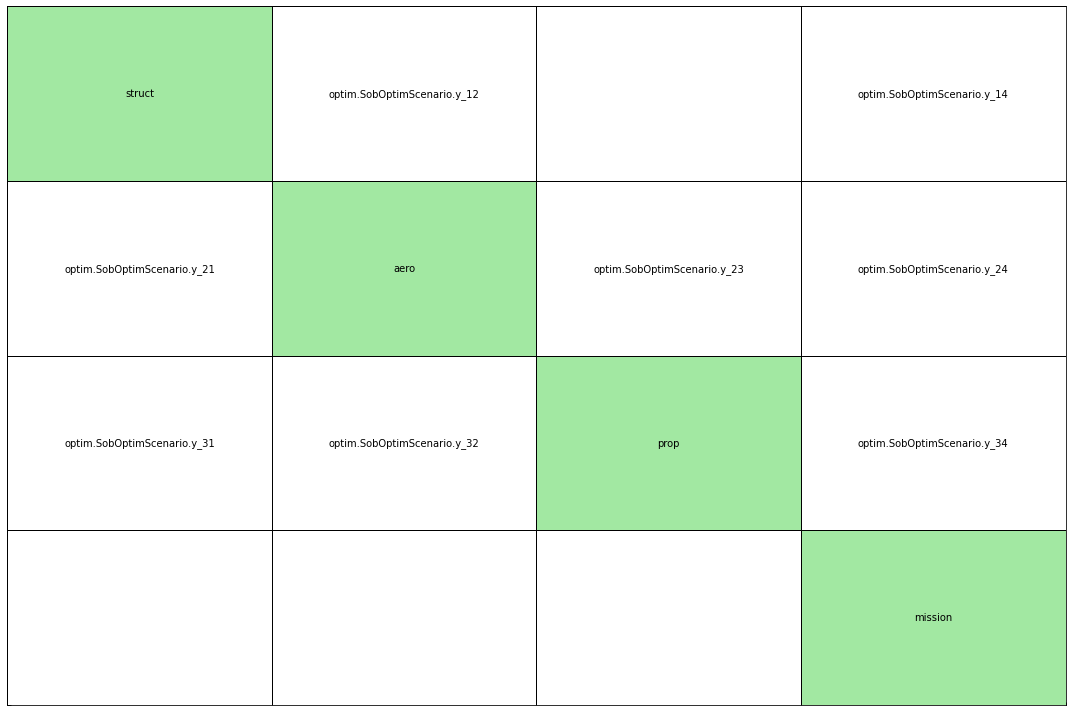

In [67]:
from gemseo.api import generate_n2_plot
generate_n2_plot(disciplines, save=False, show=True)

In [68]:
my_sc_struct.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='sc_struc_xdsm.html')
my_sc_aero.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='sc_aero_xdsm.html')
my_sc_prop.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='sc_prop_xdsm.html')
opt_disc.xdsmize(html_output=True, print_statuses=False,open_browser=False,outfilename='my_xdsm_bi_levels_sob.html')


INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : sc_struc_xdsm.html
INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : sc_aero_xdsm.html
INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : sc_prop_xdsm.html
INFO:gemseo.utils.xdsmizer:Generating HTML XDSM file in : my_xdsm_bi_levels_sob.html


In [69]:
my_sc_struct.sos_name

'sc_struct'

In [70]:
print(my_sc_struct.get_optim_variables_names())
print(my_sc_struct.design_space)
print(my_sc_struct.formulation.opt_problem)

['optim.SobOptimScenario.x_1']
Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.25 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |   1   |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0


In [71]:
print(my_sc_aero.get_optim_variables_names())
print(my_sc_aero.design_space)
print(my_sc_aero.formulation.opt_problem)

['optim.SobOptimScenario.x_2']
Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |   1   |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0


In [72]:
print(my_sc_prop.get_optim_variables_names())
print(my_sc_prop.design_space)
print(my_sc_prop.formulation.opt_problem)

['optim.SobOptimScenario.x_3']
Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     |  0.5  |      1      | float |
+----------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0


In [73]:
print(opt_disc.get_optim_variables_names())
print(opt_disc.design_space)
print(opt_disc.formulation.opt_problem)

['optim.SobOptimScenario.z']
Design space:
+--------------------------+-------------+-------+-------------+-------+
| name                     | lower_bound | value | upper_bound | type  |
+--------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.z |     0.01    |  0.05 |     0.09    | float |
| optim.SobOptimScenario.z |    30000    | 45000 |    60000    | float |
| optim.SobOptimScenario.z |     1.4     |  1.6  |     1.8     | float |
| optim.SobOptimScenario.z |     2.5     |  5.5  |     8.5     | float |
| optim.SobOptimScenario.z |      40     |   55  |      70     | float |
| optim.SobOptimScenario.z |     500     |  1000 |     1500    | float |
+--------------------------+-------------+-------+-------------+-------+
Optimization problem:
   Minimize: -optim.SobOptimScenario.y_4(optim.SobOptimScenario.z)
   With respect to: optim.SobOptimScenario.z
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.z) <= 0.0


# 6) Execute

In [74]:
print(exec_eng.execute())

INFO:SoS.EE:PROCESS EXECUTION optim STARTS...
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:SobOptimScenario
   Disciplines: SoSOptimScenario:
Disciplines: struct
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 SoSOptimScenario:
Disciplines: aero
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 SoSOptimScenario:
Disciplines: prop
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 mission
   MDOFormulation: BiLevel
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'normalize_design_space': True, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0.0, 'ctol_abs': 1e-06, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'init_step': 0.25}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_4(optim.SobOptimScenario.z)
   With respect to: optim.SobOptimScenario.z
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOpti

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.049908 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.050785 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1        0.98571214]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.98571214]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.15730365527092782
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.02994192 -0.04493466 -0.05393728 -0.05994192 -0.06619637
 -0.17380363]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.9857121415528541 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Sc

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.054913 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.43027026]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.43027026]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.553557e+00
INFO:gemseo.mda.mda:	2	1.553558e+00
INFO:gemseo.mda.mda:	3	7.789084e-01
INFO:gemseo.mda.mda:	4	8.245992e-04
INFO:gemseo.mda.mda:	5	6.646528e-06
INFO:gemseo.mda.mda:	6	5.228459e-07
INFO:gemseo.algos.driver_lib:Optimization:   4%|▍         | 2/50 [00:02<00:02, 21.64 it/sec, obj=574]
INFO:gemseo.mda.mda:	1	1.116914e+05
INFO:gemseo.mda.mda:	2	1.116914e+05
INFO:gemseo.mda.mda:	3	5.596685e+04

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 976.29 it/sec, obj=1.11]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.1087874739328383
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 12
Constraints values:
   optim.SobOptimScenario.g_3 = [-0.7550343  -0.2449657   0.         -0.05794805]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.4302702621790957 |      1      | float |
+----------------------------+---------

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_l

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.030513 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_l

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	3.761244e-13
INFO:gemseo.mda.mda:	1	2.934017e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.2871004772038968 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.030782 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28710048]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28710048]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.046994 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.32433991]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.32433991]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.003778e+00
INFO:gemseo.mda.mda:	2	2.001814e+00
INFO:gemseo.mda.mda:	3	1.000020e+00
INFO:gemseo.mda.mda:	4	1.102212e-02
INFO:gemseo.mda.mda:	5	9.179593e-03
INFO:gemseo.mda.mda:	6	8.193984e-03
INFO:gemseo.mda.mda:	7	3.425050e-03
INFO:gemseo.mda.mda:	8	1.730654e-03
INFO:gemseo.mda.mda:	9	3.386577e-05
INFO:gemseo.mda.mda:	10	1.525481e-05
INFO:gemseo.mda.mda:	11	6.981089e-06
INFO:gemseo.mda.mda:	12	1.1

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.3243399096607975 |      1      | f

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.025904 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2197.12 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 3.2031565969062648
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.034369 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Ex

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 918.74 it/sec, obj=0.256]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.25593179755143763
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [-2.87847241e-02 -1.88000814e-02 -2.52039105e-02 -3.26929762e-02
 -3.92051733e-02 -2.40000000e-01 -1.11022302e-16]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+----

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2842628773086101 |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.036517 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28710048]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28710048]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.326165e-12
INFO:gemseo.mda.mda:	1	3.636439e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1504.93 it/sec, obj=1.12]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.116945619390067
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.18281939e-01 -2.81718061e-01  4.03166389e-12 -1.27460556e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  67%|██████▋   | 20/30 [00:00<00:00, 470.19 it/sec, obj=4.01]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 4.005025486816544
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 112
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Sc

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.121520 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.30508158 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.30508158 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3050815823005407 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.045423 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28710048]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28710048]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.795443e-13
INFO:gemseo.mda.mda:	1	8.450121e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 2714.70 it/sec, obj=1.12]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.116945619390067
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-6.70237655e-01 -3.29762345e-01  4.03166389e-12 -1.27460556e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.2871004772050542 |      1      | f

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 4.3464430629265305
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 13
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.048884 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.062660 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.3794285570111968
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.02211272 -0.02195942 -0.03042617 -0.0382401  -0.04458851 -0.2149137
 -0.0250863 ]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.039338 ***
INFO:SoS.EE.SoSOptimScenario:Post ru

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |  0.4  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1560.75 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.37942855701119516
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 =

INFO:gemseo.mda.mda:	2	8.186702e+03
INFO:gemseo.mda.mda:	3	4.168867e+03
INFO:gemseo.mda.mda:	4	1.165598e+02
INFO:gemseo.mda.mda:	5	1.051940e+02
INFO:gemseo.mda.mda:	6	8.592658e+01
INFO:gemseo.mda.mda:	7	5.854595e+01
INFO:gemseo.mda.mda:	8	1.398161e+00
INFO:gemseo.mda.mda:	9	1.109601e+00
INFO:gemseo.mda.mda:	10	9.871071e-01
INFO:gemseo.mda.mda:	11	7.053131e-01
INFO:gemseo.mda.mda:	12	1.769407e-01
INFO:gemseo.mda.mda:	13	1.528916e-02
INFO:gemseo.mda.mda:	14	8.427324e-03
INFO:gemseo.mda.mda:	15	2.922903e-03
INFO:gemseo.mda.mda:	16	6.931742e-04
INFO:gemseo.mda.mda:	17	4.834334e-05
INFO:gemseo.mda.mda:	18	2.301269e-05
INFO:gemseo.mda.mda:	19	6.954877e-06
INFO:gemseo.mda.mda:	20	1.977864e-06
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'f

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  17%|█▋        | 5/30 [00:00<00:00, 824.91 it/sec, obj=1.05]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.048548126425625
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 6
Constraints values:
   optim.SobOptimScenario.g_3 = [-5.38066272e-01 -4.61933728e-01  2.22044605e-16 -1.63702736e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1951603795785728 |      1      | float |
+------------------------

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.052576 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization: 100%|██████████| 30/30 [00:00<00:00, 309.98 it/sec, obj=4.66]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 4.655052088994545
The result is not feasible.
Status: None
Optimizer message: Maximum number of iterations reached. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 58
Constraints values:
   optim.SobOptimScenario.g_2 = 0.010000000000000009
INFO:gemseo.algos.dr

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 276.24 it/sec, obj=0.342]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 6/30 [00:00<00:00, 270.80 it/sec, obj=0.342]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.3415393406352457
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 7
Constraints values:
   optim.SobOptimScenario.g_1 = [-1.49502632e-12 -1.34244817e-02 -2.63525419e-02 -3.60984403e-02
 -4.34244817e-02 -1.66506068e-01 -7.34939321e-02]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_b

INFO:gemseo.mda.mda:	8	3.948076e-03
INFO:gemseo.mda.mda:	9	1.357014e-04
INFO:gemseo.mda.mda:	10	5.838928e-05
INFO:gemseo.mda.mda:	11	3.992460e-05
INFO:gemseo.mda.mda:	12	6.928413e-06
INFO:gemseo.mda.mda:	13	1.640423e-07
INFO:gemseo.algos.driver_lib:Optimization:  20%|██        | 10/50 [00:15<00:12,  3.18 it/sec, obj=1.37e+3]
INFO:gemseo.mda.mda:	1	1.309015e+04
INFO:gemseo.mda.mda:	2	1.313394e+04
INFO:gemseo.mda.mda:	3	9.205497e+03
INFO:gemseo.mda.mda:	4	6.297282e+03
INFO:gemseo.mda.mda:	5	1.279335e+02
INFO:gemseo.mda.mda:	6	1.280766e+02
INFO:gemseo.mda.mda:	7	6.781737e+01
INFO:gemseo.mda.mda:	8	3.981439e+01
INFO:gemseo.mda.mda:	9	1.748703e+00
INFO:gemseo.mda.mda:	10	1.732490e+00
INFO:gemseo.mda.mda:	11	9.434145e-01
INFO:gemseo.mda.mda:	12	5.752228e-01
INFO:gemseo.mda.mda:	13	2.355153e-02
INFO:gemseo.mda.mda:	14	2.343856e-02
INFO:gemseo.mda.mda:	15	1.257649e-02
INFO:gemseo.mda.mda:	16	7.390575e-03
INFO:gemseo.mda.mda:	17	3.253106e-04
INFO:gemseo.mda.mda:	18	3.214140e-04
INFO:gemseo.mda.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.228085437002575 |      1      | float |
+----------------------------+-------------+-------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2990.45 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 1.0869624669965374
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.08399392e-0

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |  

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024652 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.100000001051357  |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.8935706975970724 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.074283 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1       0.8935707]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1       0.8935707]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScena

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  13%|█▎        | 4/30 [00:00<00:00, 500.25 it/sec, obj=0.27]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.27003673723679306
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 5
Constraints values:
   optim.SobOptimScenario.g_1 = [ 8.31822338e-07 -2.35042534e-02 -3.76924930e-02 -4.69848598e-02
 -5.35045306e-02 -1.16193281e-01 -1.23806719e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-----

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2987.82 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 10.151788636051409
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.026358132858673944
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.030014 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Execu

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.96362574]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to co

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.9636257365478723 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.039610 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1        0.96362574]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1        0.96362574]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     |        0.1         |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.047748 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.17757886]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.17757886]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	6.053038e-02
INFO:gemseo.mda.mda:	2	9.384755e-02
INFO:gemseo.mda.mda:	3	7.158037e-02
INFO:gemseo.mda.mda:	4	5.826652e-02
INFO:gemseo.mda.mda:	5	4.721537e-02
INFO:gemseo.mda.mda:	6	3.956122e-02
INFO:gemseo.mda.mda:	7	1.682892e-02
INFO:gemseo.mda.mda:	8	3.019245e-04
INFO:gemseo.mda.mda:	9	2.495084e-04
INFO:gemseo.mda.mda:	10	5.871065e-05
INFO:gemseo.mda.mda:	11	1.819039e-05
INFO:gemseo.mda.mda:	12	8.7

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1775788554647963 |      1      | f

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029307 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2979.97 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.00670299510045
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.020675814637652
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminat

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 506.64 it/sec, obj=0.308]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.30787390277481314
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 1.69864123e-13 -2.25082693e-02 -3.65718029e-02 -4.59089308e-02
 -5.25082693e-02 -1.21142067e-01 -1.18857933e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+----

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1033524662971968 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.182534 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.10335247 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.10335247 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.1033524662971968 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16681624]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16681624]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	2.437707e-12
INFO:gemseo.mda.mda:	1	8.587533e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gems

INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 2736.13 it/sec, obj=0.978]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9777731380903109
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-9.00777565e-01 -9.92224346e-02 -2.22044605e-16 -1.73778535e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1668162418601713 |      1      | float |
+----------------------------+------

INFO:gemseo.mda.mda:	10	3.064187e+00
INFO:gemseo.mda.mda:	11	1.078767e+00
INFO:gemseo.mda.mda:	12	7.627858e-03
INFO:gemseo.mda.mda:	13	9.685680e-05
INFO:gemseo.mda.mda:	14	1.025388e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1628559055748873 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.044282 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16285591]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16285591]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1628559055748873 |      1      | f

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029235 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.md

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1628559055748873 |      1      | f

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.489196799192902
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.015642892941204245
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.029016 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INF

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3768.81 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.4891967991929
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.015642892941204245
INFO:gemseo.algos.driver_lib:Design space:
+------------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |  

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 9.213994141348477
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.015069756658039779
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024155 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INF

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1704.40 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 9.213994141348486
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.015069756658039779
INFO:gemseo.algos.driver_lib:Design space:
+----------

INFO:gemseo.mda.mda:	8	1.551090e+00
INFO:gemseo.mda.mda:	9	8.523195e-03
INFO:gemseo.mda.mda:	10	1.833686e-06
INFO:gemseo.mda.mda:	11	1.628454e-06
INFO:gemseo.mda.mda:	12	1.168563e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.022233 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15624475]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15624475]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.algos.driver_lib:Optimization:  38%|███▊      | 19/50 [00:27<00:17,  1.79 it/sec, obj=3.47e+3]
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	5.664120e+03
INFO:gemseo.mda.mda:	2	6.367760e+03
INFO:gemseo.mda.mda:	3	3.783518e+03
INFO:gemseo.mda.mda:	4	2.605085e+03
INFO:gemseo.mda.mda:	5	1.519352e+03
INFO:gemseo.mda.mda:	6	8.258880e+02
INFO:gemseo.mda.mda:	7	5.61565

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456462875 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2658.49 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9239330847904544
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-0.865780

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024830 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 940.66 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4875807345666405
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-2.22044605e-16 -1.56285562e-02 -2.88321257e-02 -3.84788407e-02
 -4.56285562e-02 -1.15077614e-01 -1.24922386e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------------------+-------------+-------+
| name                       | lower_bound |       value       | upper_bound | type  |
+----------------------------+-------------+-------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.355556342820642 |     0.4    

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4795795243524088
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 1.33226763e-15 -1.26551918e-02 -2.54870908e-02 -3.52676071e-02
 -4.26551918e-02 -1.10315641e-01 -1.29684359e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3276510013022179 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.c

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3692.82 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.203984756156439
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.024931654733419295
INFO:gemseo.algos.driver_lib:Design space:
+----------

INFO:gemseo.mda.mda:	2	2.226667e+04
INFO:gemseo.mda.mda:	3	1.161998e+04
INFO:gemseo.mda.mda:	4	1.490211e+03
INFO:gemseo.mda.mda:	5	1.349634e+03
INFO:gemseo.mda.mda:	6	9.420448e+02
INFO:gemseo.mda.mda:	7	6.710724e+02
INFO:gemseo.mda.mda:	8	1.199138e+00
INFO:gemseo.mda.mda:	9	2.853971e-03
INFO:gemseo.mda.mda:	10	3.374535e-05
INFO:gemseo.mda.mda:	11	6.360651e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.So

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9239330847904255
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 5
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.86142123e-01 -2.13857877e-01  4.02566869e-13 -1.83255000e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456463504 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.036769 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptim

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456463504 |      1      | f

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024661 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	1.025375e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  17%|█▋        | 5/30 [00:00<00:00, 408.03 it/sec, obj=0.483]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.48255074015578986
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 6
Constraints values:
   optim.SobOptimScenario.g_1 = [-5.70654635e-13 -1.57118427e-02 -2.89258231e-02 -3.85687901e-02
 -4.57118427e-02 -1.15129790e-01 -1.24870210e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+----

INFO:gemseo.mda.mda:	6	1.546080e-01
INFO:gemseo.mda.mda:	7	3.923967e-02
INFO:gemseo.mda.mda:	8	2.680397e-03
INFO:gemseo.mda.mda:	9	2.641028e-06
INFO:gemseo.mda.mda:	10	8.920931e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1599545279255193 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028407 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15995453]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15995453]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3525639029272054 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1659.95 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.4854095553050608
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective fun

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.158766 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOpt

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.044925 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15624475]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15624475]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	1.058874e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1396.81 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5300959637389235
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.01888476 -0.03405665 -0.04484254 -0.05233806 -0.05776173 -0.13607879
 -0.10392121]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobO

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.123223 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1372.03 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5114607327149071
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.00492943 -0.02206307 -0.03483859 -0.0438507  -0.05041992 -0.1553865
 -0.0846135 ]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobOp

INFO:gemseo.mda.mda:	7	4.603900e+00
INFO:gemseo.mda.mda:	8	6.772429e-03
INFO:gemseo.mda.mda:	9	1.089678e-05
INFO:gemseo.mda.mda:	10	4.973335e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_l

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456462875 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.050590 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15624475]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15624475]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1562447456462875 |      1      | f

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.038770 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	1.033355e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.061107 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.1583091]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.1583091]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.967220e-01
INFO:gemseo.mda.mda:	2	1.975553e-01
INFO:gemseo.mda.mda:	3	9.920499e-02
INFO:gemseo.mda.mda:	4	2.491126e-03
INFO:gemseo.mda.mda:	5	2.024263e-03
INFO:gemseo.mda.mda:	6	1.815324e-03
INFO:gemseo.mda.mda:	7	1.333951e-03
INFO:gemseo.mda.mda:	8	3.015312e-04
INFO:gemseo.mda.mda:	9	2.106578e-05
INFO:gemseo.mda.mda:	10	1.361702e-05
INFO:gemseo.mda.mda:	11	7.637063e-06
INFO:gemseo.mda.mda:	12	2.767

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      o

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2467.87 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.59362325578734
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.009386263378619919
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run te

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1346.26 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5449976810452373
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.00852911 -0.024323   -0.0364811  -0.04513953 -0.05147997 -0.15658609
 -0.08341391]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+----

INFO:gemseo.mda.mda:	6	1.630140e-05
INFO:gemseo.mda.mda:	7	2.255862e-09
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+------------

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1583241062029814 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.032928 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15832411]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15832411]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.042917 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999998 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.041680 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.16166386]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.16166386]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.041755e-14
INFO:gemseo.mda.mda:	1	3.845158e-11
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_t

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 6553.26 it/sec, obj=0.941]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9413748030016914
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.50129009e-01 -2.49870991e-01  1.55431223e-15 -1.82836258e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     |

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1957.94 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.497937815941815
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.0066873648996770285
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run ter

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3134925417658309 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.045129 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.31349254 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.31349254 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2217.41 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.5059532678060785
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.0066873648996770285
INFO:gemseo.algos.driver_lib:Design space:
+--------

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      o

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 972.61 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.586250339908678
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.0013912959297852634
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run t

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	2.736628e+03
INFO:gemseo.mda.mda:	2	4.217902e+03
INFO:gemseo.mda.mda:	3	3.169055e+03
INFO:gemseo.mda.mda:	4	2.901966e+03
INFO:gemseo.mda.mda:	5	1.766199e+03
INFO:gemseo.mda.mda:	6	3.867256e+02
INFO:gemseo.mda.mda:	7	2.094291e+02
INFO:gemseo.mda.mda:	8	4.653835e-02
INFO:gemseo.mda.mda:	9	5.003656e-03
INFO:gemseo.mda.mda:	10	2.116311e-04
INFO:gemseo.mda.mda:	11	1.147036e-05
INFO:gemseo.mda.mda:	12	1.599989e-08
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: Disciplina

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  17%|█▋        | 5/30 [00:00<00:00, 850.03 it/sec, obj=0.927]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9267851850155895
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 6
Constraints values:
   optim.SobOptimScenario.g_3 = [-0.78805258 -0.21194742  0.         -0.183255  ]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1571294811445498 |      1      | float |
+----------------------------+---------

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2721.04 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.942196466221803
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.014010385824466898
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.032524 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Execut

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1571294811445498 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:ge

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.026608 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4298.47 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.770675686319645
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.014550557271131304
INFO:gemseo.algos.driver_lib:Design space:
+----------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.026649 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3505.77 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.061728473709133
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.02307293062547311
INFO:gemseo.algos.driver_lib:Design space:
+-----------

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.072316 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.25465132 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.25465132 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5307271992590458
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.01423242 -0.02726148 -0.03697102 -0.04423242 -0.10892402
 -0.13107598]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2546513247022811 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Sce

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.036607 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2435.48 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.906781078507067
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.013100389535306123
INFO:gemseo.algos.driver_lib:Design space:
+----------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.035664 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With re

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2718.98 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.889472996641535
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.007002359278104109
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run term

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.33313637 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to co

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3331363715817416 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.032337 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.33313637 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.33313637 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3308.33 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.887880829307122
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.007002359278104109
INFO:gemseo.algos.driver_lib:Design space:
+----------

INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28135656 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28135656 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimiz

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 813.38 it/sec, obj=0.538]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5382389971703527
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_1 = [ 0.         -0.01764145 -0.03109663 -0.04065276 -0.04764145 -0.12016805
 -0.11983195]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2813565585848093 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    | 0.7500000000000002 |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.066881 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.28135656 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.28135656 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3664.85 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.860070235150327
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.01805361244613568
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termi

INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.22861785 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to co

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2286178512538739 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.048635 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.22861785 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.22861785 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimS

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.2286178512538739 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028923 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15848727]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15848727]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	7.159151e-02
INFO:gemseo.mda.mda:	2	7.159152e-02
INFO:gemseo.mda.mda:	3	3.604346e-02
INFO:gemseo.mda.mda:	4	3.593326e-05
INFO:gemseo.mda.mda:	5	1.695242e-07
INFO:gemseo.algos.driver_lib:Optimization:  80%|████████  | 40/50 [00:53<00:00, 56.14 it/min, obj=3.69e+3]
INFO:gemseo.mda.mda:	1	5.134109e+02
INFO:gemseo.mda.mda:	2	5.134128e+02
INFO:gemseo.mda.mda:	3	4.027966e+02
INFO:gemseo.mda.mda:	4	1.65773

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1584872677083137 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4149.49 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9314002171847217
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.855793

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.040895 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.29325746 0.75      ]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.29325746 0.75      ]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.mda.mda:	1	4.677540e+03
INFO:gemseo.mda.mda:	2	4.752357e+03
INFO:gemseo.mda.mda:	3	2.531832e+03
INFO:gemseo.mda.mda:	4	2.540828e+02
INFO:gemseo.mda.mda:	5	2.414652e+02
INFO:gemseo.mda.mda:	6	1.623996e+02
INFO:gemseo.mda.mda:	7	8.493578e+01
INFO:gemseo.mda.mda:	8	1.111814e-01
INFO:gemseo.mda.mda:	9	8.122389e-03
INFO:gemseo.mda.mda:	10	5.535051e-06
INFO:gemseo.mda.mda:	11	4.424531e-08
INFO

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1584872677083137 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  17%|█▋        | 5/30 [00:00<00:00, 1007.78 it/sec, obj=0.924]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9239330847904373
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 6
Constraints values:
   optim.SobOptimScenario.g_3 =

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028501 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 4488.13 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.078871060529845
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.00932469579337436
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run termi

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bou

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1575616210220071 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.034619 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15756162]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15756162]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0,

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1575616210220071 |      1      | f

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.026430 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	2.021005e-11
INFO:gemseo.mda.mda:	1	7.994424e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 

INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 2491.86 it/sec, obj=0.929]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9289238679051518
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 4
Constraints values:
   optim.SobOptimScenario.g_3 = [-7.83105855e-01 -2.16894145e-01  2.12496687e-13 -1.82976141e-01]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1575616210220071 |      1      | float |
+----------------------------+------

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 3516.15 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 7.933844323431845
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.004528408034609743
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run term

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3931342369719919 |     0.4     | 

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.026219 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.15655478]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.15655478]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0, optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)]
INFO:gemseo.mda.mda:	1	1.354281e-13
INFO:gemseo.mda.mda:	1	5.393236e+02
INFO:gemseo.mda.mda:	2	5.413526e+02
INFO:gemseo.mda.mda:	3	2.717124e+02
INFO:gemseo.mda.mda:	4	5.983477e-01
INFO:gemseo.mda.mda:	5	5.802228e-01
INFO:gemseo.mda.mda:	6	4.527963e-01
INFO:gemseo.mda.mda:	7	3.092226e-01
INFO:gemseo.mda.mda:	8	8.326455e-05
INFO:gemseo.mda.mda:	9	4.060020e-07
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:***

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1565547778532179 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  10%|█         | 3/30 [00:00<00:00, 1433.33 it/sec, obj=0.925]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9250166003544267
The result is feasible.
Status: None
Optimizer message: Successive iterates of the objective function are closer than ftol_rel or ftol_abs. GEMSEO Stopped the driver
Number of calls to the objective function by th

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.038360 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.m

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.031812 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	5.455685e+03
INFO:gemseo.mda.mda:	2	5.456226e+03
INFO:gemseo.mda.mda:	3	2.740820e+03
INFO:gemseo.mda.mda:	4	8.350671e+00
INFO:gemseo.mda.mda:	5	8.096353e+00
INFO:gemseo.mda.mda:	6	6.351594e+00
INFO:gemseo.mda.mda:	7	4.240814e+00
INFO:gemseo.mda.mda:	8	1.501161e-02
INFO:gemseo.mda.mda:	9	1.039513e-04
INFO:gemseo.mda.mda:	10	2.476308e-08
INFO:gemseo.core.mdo_scenario: 
INFO:ge

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1565547778532179 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 1626.90 it/sec, obj=0.926]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.9260439780282637
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 3
Constraints values:
   optim.SobOptimScenario.g_3 =

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.024421 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2062.23 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.057095159920653
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.0
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 2486.05 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.023593859963828
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -0.001023961440253629
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run term

INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| opti

INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.041702 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0, -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)]
INFO:gemseo.mda.md

INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_3 |     0.1     | 0.1568970948326493 |      1      | float |
+----------------------------+-------------+--------------------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:ge

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.022974220738687
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = -2.4537005374192233e-05
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028992 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]
I

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.03521249080638
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.00036230888647770243
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.028866 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.75]

INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
     

INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 495.96 it/sec, obj=0.562]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5619424756776379
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 17
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.01954225 -0.03446827 -0.04514124 -0.05257221 -0.05795418 -0.13667277
 -0.10332723]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999999 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------

INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With re

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 894.80 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5614075821410041
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.0199397  -0.03477709 -0.0453893  -0.05277855 -0.05813052 -0.13645908
 -0.10354092]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999999 |     0.4     | float |
| optim.SobOp

INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)
   With respect to: optim.SobOptimScenario.x_1
   Subject to constraints:
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
      optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999999 |     0.4     | 

INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 950.15 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5614075821410041
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.0199397  -0.03477709 -0.0453893  -0.05277855 -0.05813052 -0.13645908
 -0.10354092]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999999 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------------+-----

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_prop
   Disciplines: prop
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: optim.SobOptimScenario.y_34(optim.SobOptimScenario.x_3)
   With respect to: optim.SobOptimScenario.x_3
   Subject to constraints:
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
      optim.SobOptimScenario.g_3(optim.SobOptimScenario.x_3) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound | 

INFO:gemseo.algos.driver_lib:Optimization:   0%|          | 0/30 [00:00<?, ?it]
INFO:gemseo.algos.driver_lib:
INFO:gemseo.algos.driver_lib:Optimization:  47%|████▋     | 14/30 [00:00<00:00, 645.76 it/sec, obj=8.03]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.025059077191026
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 68
Constraints values:
   optim.SobOptimScenario.g_2 = 0.00012991788925997838
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO S

INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | uppe

INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.025059077191008
The result is not feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 13
Constraints values:
   optim.SobOptimScenario.g_2 = 0.00012991788925997838
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.051899 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.7

INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| optim.SobOptimScenario.x_2 |     0.75    |  0.75 |     1.25    | float |
+----------------------------+-------------+-------+-------------+-------+
INFO:gemseo.algos.driver_lib:Optimization:   3%|▎         | 1/30 [00:00<00:00, 1930.34 it/sec]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 8.056004361434171
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 2
Constraints values:
   optim.SobOptimScenario.g_2 = 0.0
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound

INFO:gemseo.core.mdo_scenario:*** MDO Scenario run terminated in 0:00:00.152733 ***
INFO:SoS.EE.SoSOptimScenario:Post run at xopt
INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [0.4  0.75]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, optim.SobOptimScenario.g_1(optim.SobOptimScenario.x_1) <= 0.0, -optim.SobOptimScenario.y_11(optim.SobOptimScenario.x_1)]
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
IN

INFO:gemseo.algos.driver_lib:Optimization:   7%|▋         | 2/30 [00:00<00:00, 261.89 it/sec, obj=0.561]
INFO:gemseo.algos.driver_lib:Optimization result:
Objective value = 0.5614583714169571
The result is feasible.
Status: 8
Optimizer message: Positive directional derivative for linesearch
Number of calls to the objective function by the optimizer: 47
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.01894787 -0.03411096 -0.04488786 -0.05237651 -0.057795   -0.13599344
 -0.10400656]
INFO:gemseo.algos.driver_lib:Design space:
+----------------------------+-------------+--------------------+-------------+-------+
| name                       | lower_bound |       value        | upper_bound | type  |
+----------------------------+-------------+--------------------+-------------+-------+
| optim.SobOptimScenario.x_1 |     0.1     | 0.3999999999999999 |     0.4     | float |
| optim.SobOptimScenario.x_1 |     0.75    |        0.75        |     1.25    | float |
+----------------------

INFO:gemseo.core.mdo_scenario:sc_aero
   Disciplines: aero
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel': 1e-07, 'ftol_abs': 1e-07, 'max_time': 0, 'disp': 0, 'eq_tolerance': 0.01, 'ineq_tolerance': 0.0001, 'normalize_design_space': True}
INFO:gemseo.algos.opt.opt_lib:Optimization problem:
   Minimize: -optim.SobOptimScenario.y_24(optim.SobOptimScenario.x_2)
   With respect to: optim.SobOptimScenario.x_2
   Subject to constraints:
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
      optim.SobOptimScenario.g_2(optim.SobOptimScenario.x_2) <= 0.0
INFO:gemseo.algos.opt.opt_lib:Design space:
+----------------------------+-------------+-------+-------------+-------+
| name                       | lower_bound | value | upper_bound | type  |
+----------------------------+-------------+-------+-------------+-------+
| opti

{'optim.SobOptimScenario.max_iter': array([50]), 'optim.SobOptimScenario.ineq_constraints': [1, 1, 1], 'optim.SobOptimScenario.eq_constraints': [], 'optim.SobOptimScenario.algo': 1, 'optim.SobOptimScenario.design_space': array(['z', 'x_1', 'x_2', 'x_3', 'y_14', 'y_32', 'y_31', 'y_24', 'y_34',
       'y_23', 'y_21', 'y_12',
       list([0.05, 45000.0, 1.6, 5.5, 55.0, 1000.0]), list([0.25, 1.0]),
       list([1.0]), list([0.5]), list([50606.9741711, 7306.20262124]),
       list([0.50279625]), list([6354.32430691]), list([4.15006276]),
       list([1.10754577]), list([12194.2671934]), list([50606.9741711]),
       list([50606.9742, 0.95]),
       list([0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]), list([0.1, 0.75]),
       list([0.75]), list([0.1]), list([24850.0, -7700.0]), list([0.235]),
       list([2960.0]), list([0.44]), list([0.44]), list([3365.0]),
       list([24850.0]), list([24850.0, 0.45]),
       list([0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]), list([0.4, 1.25]),
       list([1.25]), 

# 7) Explore results

In [75]:
# retrieve discipline to check the result...
opt_disc = exec_eng.dm.get_disciplines_with_name("optim." + sc_name)[0]

In [76]:
opt_disc.get_disc_full_name()

'optim.SobOptimScenario'

In [77]:
DESC_IN = opt_disc.DESC_IN
DESC_OUT = opt_disc.DESC_OUT
DESC_IN_df = pd.DataFrame.from_dict(DESC_IN,orient='index')
DESC_OUT_df = pd.DataFrame.from_dict(DESC_OUT,orient='index')

In [78]:
DESC_IN_df

,type,default,structuring,possible_values,dataframe_descriptor,dataframe_edition_locked
max_iter,float,NaN,NaN,NaN,NaN,NaN
ineq_constraints,string_list,[],True,NaN,NaN,NaN
eq_constraints,string_list,[],True,NaN,NaN,NaN
algo,string,NaN,True,NaN,NaN,NaN
design_space,dataframe,NaN,True,NaN,NaN,NaN
formulation,string,NaN,True,NaN,NaN,NaN
maximize_objective,bool,False,True,NaN,NaN,NaN
objective_name,string,NaN,True,NaN,NaN,NaN
differentiation_method,string,finite_differences,True,"[user, finite_differences, complex_step]",NaN,NaN
algo_options,dict,"{'ftol_rel': 3e-16, 'normalize_design_space': ...",True,NaN,"{'variable': ('string', None, False), 'value':...",False


In [79]:
DESC_OUT_df

,type
design_space_out,dataframe


In [80]:
opt_disc.get_data_io_dict('in')['formulation']['value']

'BiLevel'

In [81]:
opt_disc.get_data_io_dict('in')['algo']['value']

'NLOPT_COBYLA'

In [82]:
opt_disc.get_data_io_dict('in')['objective_name']['value']

'y_4'

In [83]:
opt_disc.optimization_result.f_opt

3927.180414114229

In [84]:
opt_disc.optimization_result.x_opt

array([6.00000000e-02, 6.00000000e+04, 1.40260347e+00, 2.50000000e+00,
       7.00000000e+01, 1.48782270e+03])

In [85]:
opt_disc._post_run()

INFO:SoS.EE.SoSOptimScenario:Executing at xopt point [6.00000000e-02 6.00000000e+04 1.40260347e+00 2.50000000e+00
 7.00000000e+01 1.48782270e+03]
INFO:SoS.EE.SoSOptimScenario:x_opt from problem solution is [6.00000000e-02 6.00000000e+04 1.40260347e+00 2.50000000e+00
 7.00000000e+01 1.48782270e+03]
INFO:SoS.EE.SoSOptimScenario:list of functions to evaluate [optim.SobOptimScenario.g_1(optim.SobOptimScenario.z) <= 0.0, optim.SobOptimScenario.g_2(optim.SobOptimScenario.z) <= 0.0, optim.SobOptimScenario.g_3(optim.SobOptimScenario.z) <= 0.0, -optim.SobOptimScenario.y_4(optim.SobOptimScenario.z)]
INFO:gemseo.mda.mda:	1	1.025375e-10
INFO:gemseo.mda.mda:	1	0.000000e+00
INFO:gemseo.mda.mda:	1	1.025375e-10
INFO:gemseo.core.mdo_scenario: 
INFO:gemseo.core.mdo_scenario:*** Start MDO Scenario execution ***
INFO:gemseo.core.mdo_scenario:sc_struct
   Disciplines: struct
   MDOFormulation: DisciplinaryOpt
   Algorithm: None
INFO:SoS.EE.SoSOptimScenario:{'xtol_rel': 1e-07, 'xtol_abs': 1e-07, 'ftol_rel':

In [86]:
opt_disc.get_data_io_dict('out')['design_space_out']['value'] 

,variable,value,lower_bnd,upper_bnd,enable_variable,activated_elem
0,z,"[0.06000000000000001, 60000.0, 1.4026034683132...","[0.01, 30000.0, 1.4, 2.5, 40.0, 500.0]","[0.09, 60000.0, 1.8, 8.5, 70.0, 1500.0]",True,"[True, True, True, True, True, True]"
1,x_1,"[0.25, 1.0]","[0.1, 0.75]","[0.4, 1.25]",True,"[True, True]"
2,x_2,[1.0],[0.75],[1.25],True,[True]
3,x_3,[0.5],[0.1],[1.0],True,[True]
0,y_14,"[50606.9741711, 7306.20262124]","[24850.0, -7700.0]","[77100.0, 45000.0]",True,"[True, True]"
1,y_32,[0.50279625],[0.235],[0.795],True,[True]
2,y_31,[6354.32430691],[2960.0],[10185.0],True,[True]
3,y_24,[4.15006276],[0.44],[11.13],True,[True]
4,y_34,[1.10754577],[0.44],[1.98],True,[True]
5,y_23,[12194.2671934],[3365.0],[26400.0],True,[True]


# 8 gemseo post treatment

In [87]:
opt_results = opt_disc.get_optimum()
opt_results

Optimization result:
   Design variables: [6.00000000e-02 6.00000000e+04 1.40260347e+00 2.50000000e+00
 7.00000000e+01 1.48782270e+03]
   Objective function: 3927.180414114229
   Feasible solution: True

In [88]:
print("The solution of P is (x*,f(x*)) = ({}, {})".format(opt_results.x_opt,
                                                          opt_results.f_opt))
print(opt_results)
print(opt_disc.optimization_result)

The solution of P is (x*,f(x*)) = ([6.00000000e-02 6.00000000e+04 1.40260347e+00 2.50000000e+00
 7.00000000e+01 1.48782270e+03], 3927.180414114229)
Optimization result:
Objective value = 3927.180414114229
The result is feasible.
Status: None
Optimizer message: Maximum number of iterations reached. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 52
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.01894787 -0.03411096 -0.04488786 -0.05237651 -0.057795   -0.13599344
 -0.10400656]
   optim.SobOptimScenario.g_2 = 0.0
   optim.SobOptimScenario.g_3 = [-7.72098349e-01 -2.27901651e-01  6.21724894e-15 -1.82915727e-01]
Optimization result:
Objective value = 3927.180414114229
The result is feasible.
Status: None
Optimizer message: Maximum number of iterations reached. GEMSEO Stopped the driver
Number of calls to the objective function by the optimizer: 52
Constraints values:
   optim.SobOptimScenario.g_1 = [-0.01894787 -0.03411096 -0.04488786 -0.0523765

In [89]:
opt_problem = opt_disc.formulation.opt_problem
dataset = opt_problem.export_to_dataset("dataset_name")

In [90]:
print(dataset)

dataset_name
   Number of samples: 50
   Number of variables: 5
   Variables names and sizes by group:
      design_parameters: optim.SobOptimScenario.z (6)
      functions: optim.SobOptimScenario.g_3 (4), -optim.SobOptimScenario.y_4 (1), optim.SobOptimScenario.g_2 (1), optim.SobOptimScenario.g_1 (7)
   Number of dimensions (total = 19) by group:
      design_parameters: 6
      functions: 13


In [91]:
XY_pd=dataset.export_to_dataframe()
XY_pd

design_parameters                                               \
   optim.SobOptimScenario.z                                                
                          0             1         2         3          4   
0                  0.050000  45000.000000  1.600000  5.500000  55.000000   
1                  0.070000  45000.000000  1.600000  5.500000  55.000000   
2                  0.070000  52500.000000  1.600000  5.500000  55.000000   
3                  0.070000  52500.000000  1.700000  5.500000  55.000000   
4                  0.070000  52500.000000  1.600000  7.000000  55.000000   
5                  0.070000  52500.000000  1.600000  5.500000  62.500000   
6                  0.070000  52500.000000  1.600000  5.500000  62.500000   
7                  0.066000  56510.025718  1.567379  4.427044  61.219427   
8                  0.066402  58251.438558  1.538718  5.607755  57.553813   
9                  0.059124  55944.202460  1.567379  4.478897  61.219427   
10                 0.054334  60000.000000  1.522785  4.353731  65.194462   
11                 0.053410  60000.000000  1.580313  4.750659  70.000000   
12                 0.054831  59638.853911  1.514835  4.339870  64.962466   
13                 0.054901  60000.000000  1.434950  4.110646  69.303581   
14                 0.055482  60000.000000  1.469899  3.837705  70.000000   
15                 0.054804  59882.663477  1.440082  3.707789  69.288408   
16                 0.056089  60000.000000  1.422668  2.522194  70.000000   
17                 0.056233  60000.000000  1.400000  2.500000  70.000000   
18                 0.055544  60000.000000  1.400000  2.500000  70.000000   
19                 0.055073  60000.000000  1.400000  2.500000  70.000000   
20                 0.053767  59424.226750  1.401987  2.505677  69.981112   
21                 0.060000  60000.000000  1.400000  2.500000  66.739137   
22                 0.055109  59435.610293  1.401580  2.506508  69.724474   
23                 0.060000  60000.000000  1.400000  2.566409  68.487228   
24                 0.059994  59986.708838  1.402622  2.910187  68.479256   
25                 0.060000  60000.000000  1.400000  2.837016  69.630067   
26                 0.062347  59911.928784  1.410908  2.837679  69.237819   
27                 0.060297  59669.773005  1.400546  2.846282  69.973579   
28                 0.062005  59211.717503  1.403212  2.839476  69.960065   
29                 0.058328  59546.994764  1.411454  2.830733  69.186233   
30                 0.060348  59598.247981  1.406634  2.823350  69.779495   
31                 0.056497  59852.106250  1.400000  2.581541  70.000000   
32                 0.056362  59525.928060  1.404806  2.589376  69.709397   
33                 0.054232  60000.000000  1.400000  2.500000  70.000000   
34                 0.056725  59869.245058  1.404533  2.572299  69.932457   
35                 0.060000  60000.000000  1.400000  2.663082  70.000000   
36                 0.058249  59989.583707  1.400000  2.712439  70.000000   
37                 0.056290  59841.757309  1.400112  2.594706  69.964738   
38                 0.055487  59778.780911  1.400000  2.663082  70.000000   
39                 0.056617  59656.126401  1.401090  2.580496  69.993936   
40                 0.057669  60000.000000  1.400000  2.500000  70.000000   
41                 0.056550  59830.543168  1.402140  2.576162  69.740476   
42                 0.058868  60000.000000  1.402249  2.620720  70.000000   
43                 0.058967  59952.604241  1.400206  2.615672  69.825238   
44                 0.060000  60000.000000  1.402603  2.500000  70.000000   
45                 0.059744  59952.236044  1.402656  2.511853  69.839778   
46                 0.059994  59994.937228  1.405271  2.502503  69.842091   
47                 0.060091  59956.639022  1.400606  2.504823  69.870135   
48                 0.060111  59937.683546  1.402489  2.507247  69.977692   
49                 0.060032  59973.722925  1.402243  2.508

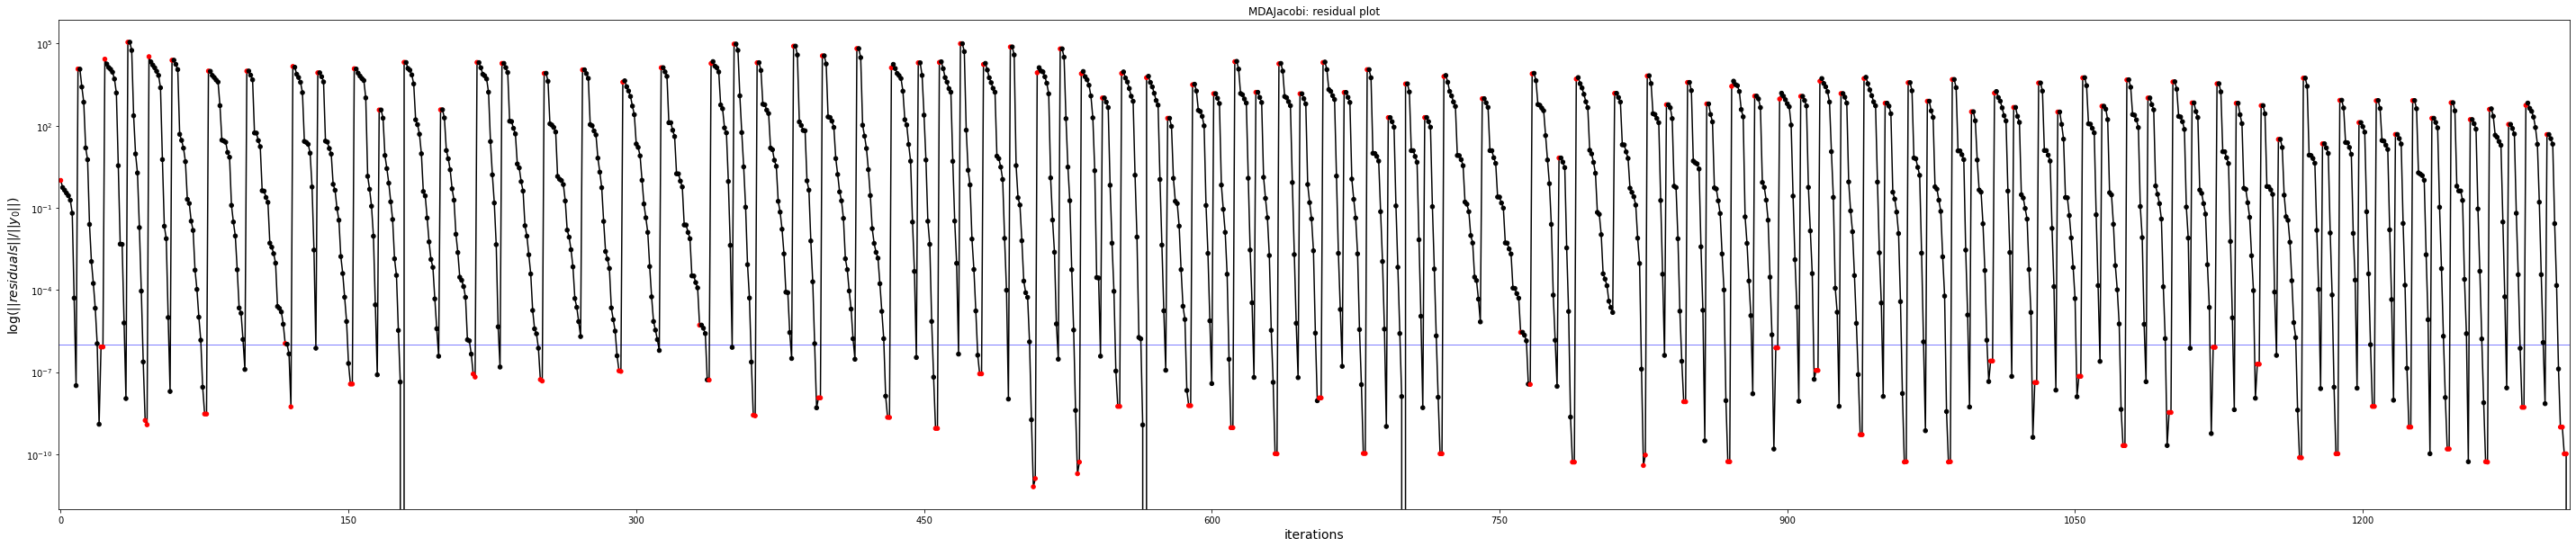

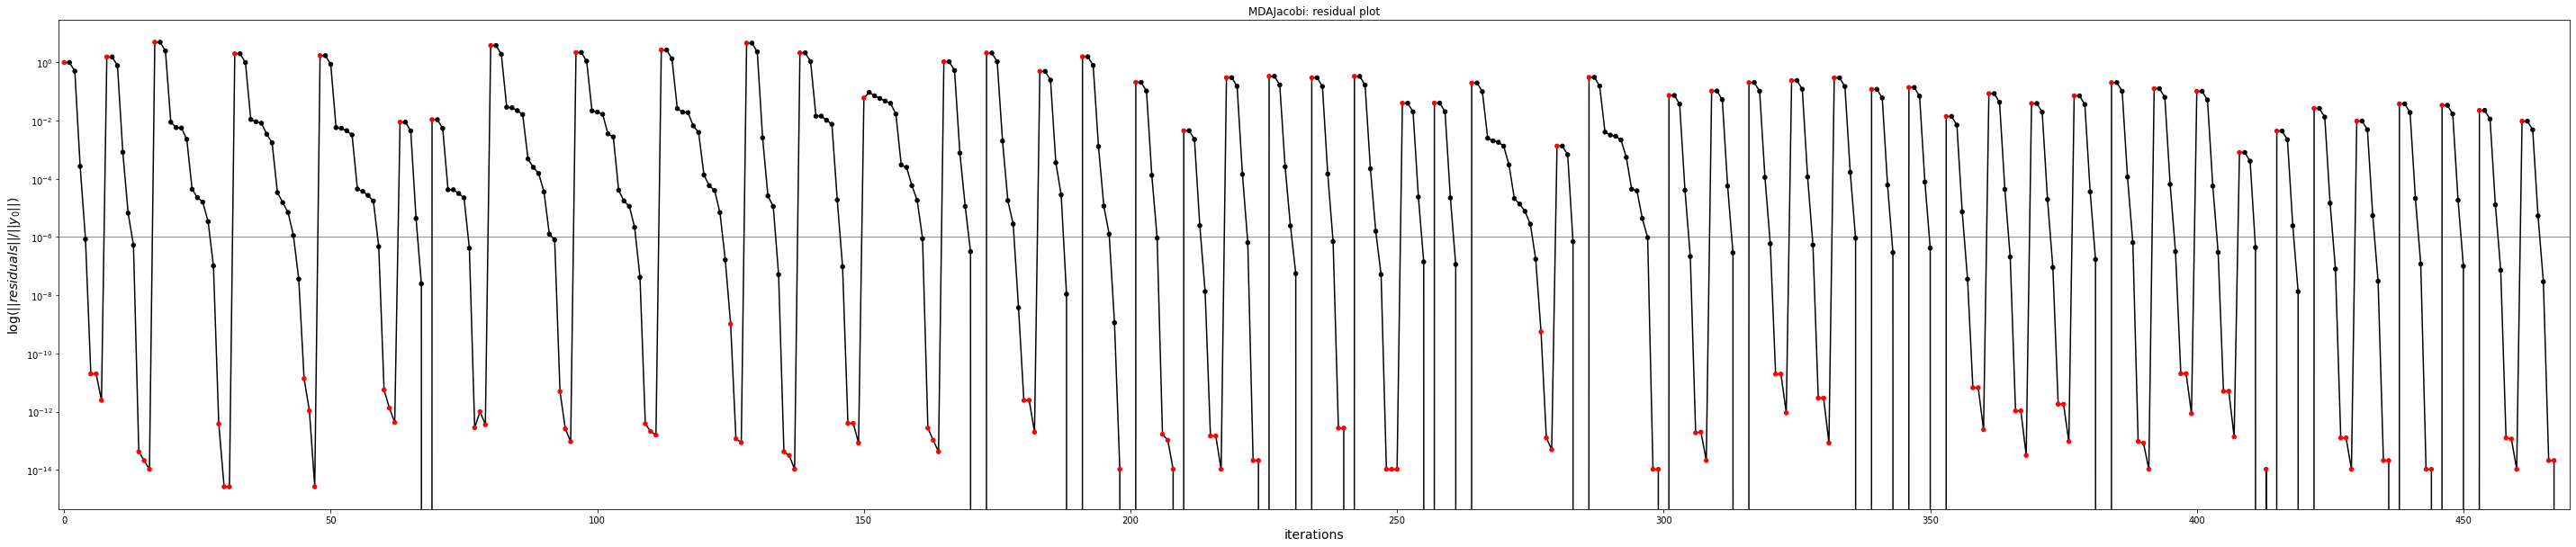

In [92]:
opt_disc.formulation.mda1.plot_residual_history(show=True, save=False)
opt_disc.formulation.mda2.plot_residual_history(show=True, save=False)

In [93]:
#Plot the optimization history view

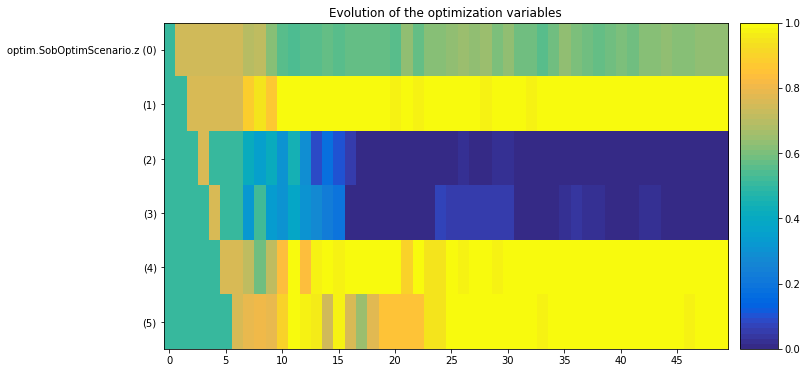

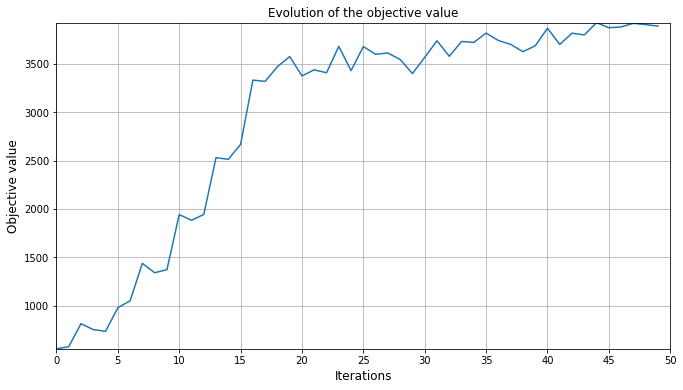

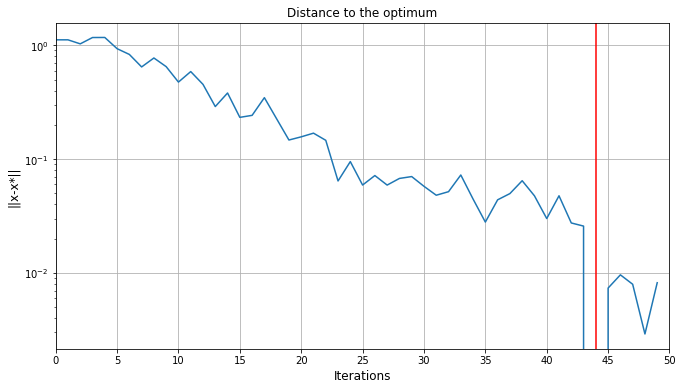

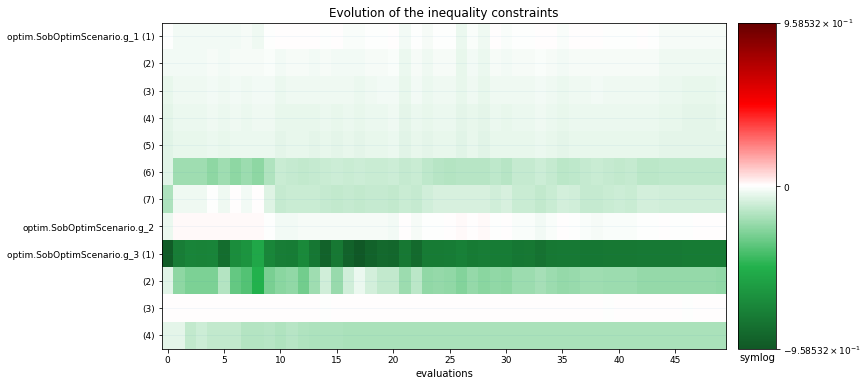

struct: 4304 calls.
aero: 2903 calls.
prop: 2677 calls.
mission: 157 calls.


In [94]:
opt_disc.post_process("OptHistoryView", show=True, save=False)
for disc in [my_struct, my_aero, my_prop, my_mission]:
    print("{}: {} calls.".format(disc.name, disc.n_calls))

In [95]:
len(exec_eng.dm.disciplines_dict.keys())

9

In [96]:
for item in exec_eng.dm.disciplines_dict.keys():
    print(exec_eng.dm.disciplines_dict[item])

{'reference': optim
   Inputs: optim.SobOptimScenario.algo, optim.SobOptimScenario.algo_options, optim.SobOptimScenario.design_space, optim.SobOptimScenario.differentiation_method, optim.SobOptimScenario.eq_constraints, optim.SobOptimScenario.formulation, optim.SobOptimScenario.ineq_constraints, optim.SobOptimScenario.max_iter, optim.SobOptimScenario.objective_name, optim.SobOptimScenario.parallel_options
   Outputs: optim.SobOptimScenario.design_space_out, 'classname': 'SoSCoupling', 'model_name': 'execution_engine', 'model_name_full_path': 'sos_trades_core.execution_engine.sos_coupling', 'treeview_order': 'no', 'ns_reference': <sos_trades_core.execution_engine.namespace.Namespace object at 0x000002ED42B17DC0>, 'status': 'DONE'}
{'reference': SobOptimScenario
   Disciplines: SoSOptimScenario:
Disciplines: struct
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 SoSOptimScenario:
Disciplines: aero
MDOFormulation: DisciplinaryOpt
Algorithm: SLSQP
 SoSOptimScenario:
Disciplines: prop
MDO